Using Deep Neural Network

In [2]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('drive/MyDrive/Exp_consolidated.csv')

In [4]:
data.head()

,Unnamed: 0,EXP No,Speed,Feed,DoC,WoC,Coolant,Dir,Toolwear,Ra,Rz,Mean Spindle Power,Mean MRR
0,0,DOE02_L01,3000,1400,0.5,0.6,1,1,0.0,0.9121,5.0166,167.187627,0.42
1,1,DOE02_L02,4000,2000,0.5,1.0,1,1,0.0,2.1492,10.2291,245.121265,1.00
2,2,DOE02_L03,2000,800,0.5,1.4,1,0,0.0,2.5493,10.7525,93.568688,0.56
3,3,DOE02_L04,1000,200,0.5,0.2,1,0,0.0,0.7172,4.3944,26.367502,0.02
4,4,DOE02_L05,2000,200,1.5,1.0,1,1,0.0,1.9792,9.1521,91.177596,0.30


In [5]:
xtrain=data[['Feed', 'Speed', 'DoC', 'WoC', 'Dir', 'Coolant']]
ytrain=data[['Ra']]
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)

In [6]:
data1=pd.read_csv("drive/MyDrive/Test_consolidated.csv")
xtest=data1[['Feed', 'Speed', 'DoC', 'WoC', 'Dir', 'Coolant']]
ytest=data1[['Ra']]
xtest=np.array(xtest)
ytest=np.array(ytest)

In [7]:
model = keras.Sequential()
model.add(keras.layers.Dense(54, input_dim=6, activation='relu'))
model.add(keras.layers.Dense(21, activation='tanh'))
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(1,  activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(xtrain, ytrain, epochs=50, batch_size=2)
model.summary()

Epoch 1/50
32/32 [==============================] - 3s 9ms/step - loss: -1.7927
Epoch 2/50
32/32 [==============================] - 0s 7ms/step - loss: -5.0767
Epoch 3/50
32/32 [==============================] - 0s 6ms/step - loss: -8.7561
Epoch 4/50
32/32 [==============================] - 0s 6ms/step - loss: -13.1802
Epoch 5/50
32/32 [==============================] - 0s 8ms/step - loss: -18.3607
Epoch 6/50
32/32 [==============================] - 0s 7ms/step - loss: -24.3566
Epoch 7/50
32/32 [==============================] - 0s 5ms/step - loss: -31.5722
Epoch 8/50
32/32 [==============================] - 0s 8ms/step - loss: -39.3161
Epoch 9/50
32/32 [==============================] - 0s 5ms/step - loss: -48.3761
Epoch 10/50
32/32 [==============================] - 0s 7ms/step - loss: -58.1171
Epoch 11/50
32/32 [==============================] - 0s 3ms/step - loss: -68.8868
Epoch 12/50
32/32 [==============================] - 0s 8ms/step - loss: -80.8688
Epoch 13/50
32/32 [=========

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
pred=model.predict(xtest)
mae = mean_absolute_error(ytest,pred)
mae

1/1 [==============================] - 0s 211ms/step


1.2212125

In [10]:
mse=mean_squared_error(pred,ytest)
mse

2.50644553125

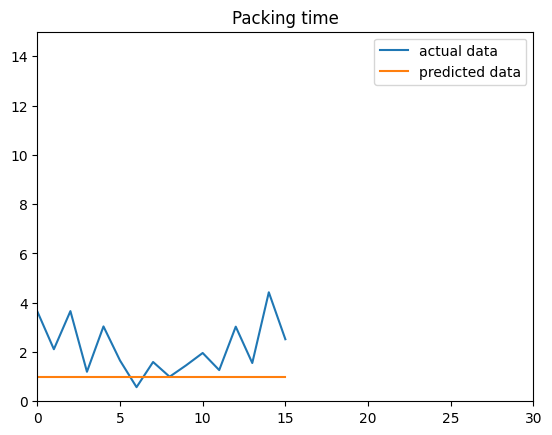

In [11]:
plt.plot(ytest[:,0], label="actual data")
plt.plot(pred[:,0], label="predicted data")
plt.xlim(0, 30)
plt.ylim(0, 15)
plt.title("Packing time")
plt.legend()
plt.show()

In [12]:
import pickle
file=open('neural.pkl','wb')
pickle.dump(model,file)